<a href="https://colab.research.google.com/github/Positron23/ignitionhacks/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization


Check GPU

In [1]:
!nvidia-smi

Mon Aug 24 03:58:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Install Tensorflow-GPU 


In [2]:
!pip install tensorflow-gpu
!pip install tensorflow_text

     |████████████████████████████████| 320.4MB 52kB/s 
     |████████████████████████████████| 2.6MB 2.8MB/s 


Import Packages

In [3]:
# DATA PROCESSING
import numpy as np
import pandas as pd
import gzip # To utilize previously encoded data

# DEEP LEARNING
import tensorflow as tf 
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text

# PREPROCESSING
import re
import inflect
import string, unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# DATA DISPLAY
import matplotlib.pyplot as plt
from tqdm import tqdm #For showing progress bars

# Preprocessing

In [5]:
# READ ORIGINAL DATA
df = pd.read_csv('training_data.csv', usecols=['Text', 'Sentiment'])
print(df.shape)

(218598, 2)


In [34]:
# SET RANDOM SEED FOR REPRODUCIBLE TRAIN/DEV/TEST SETS
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

#tf.random.set_seed(RANDOM_SEED)

In [8]:
# SPLIT DATA
train, test, y_train, y_test =\
  train_test_split(
    df.Text, 
    df.Sentiment, 
    test_size=.1, 
    random_state=RANDOM_SEED)

In [5]:
# DOWNLOAD NATURAL LANGUAGE PREPROCESSING TOOLKITS
nltk.download('punkt') # for stemming 
nltk.download('stopwords') # for stopwords
porter = PorterStemmer() # create porter stemming algorithm object

In [9]:
# CHECK SHAPES AND DATA
print(train.shape)
print(test.shape)
train.head()

(900000,)
(100000,)


378046    @plsdontgogurl That's the one. I wish I have a...
510062               I just woke up and I feel soooo tired 
534815    @nainargrl I wish I could do that   I am not t...
342590      @MariahCarey  lol hey i am in bed too cuddling 
559414    today i'm going to friend's house  it's gonna ...
Name: Text, dtype: object

# Encoding


## Extract from previously encoded data

Add training and test datasets to your drive by right clicking and selecting 'make a shortcut to your drive'. Afterwards, the output will prompt for an authentication password, which you can receive by allowing the file stream to access the drive in which the datasets are stored.

In [3]:
# from google.colab import drive
# drive.mount("/content/drive")

In [11]:
f=gzip.GzipFile('/content/drive/My Drive/train.npy.gz','r')
X_train = np.load(f)
X_train = np.array(X_train)
f2=gzip.GzipFile('/content/drive/My Drive/test.npy.gz','r')
X_test = np.load(f2)
X_test = np.array(X_test)


## Re-encode data (~3 to 4 hours)


In [ ]:
# LOAD UNIVERAL SERIAL ENCODER
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")


In [ ]:
## OLD ENCODING ALGORITHM ##
# splitlist = np.array_split(trainlist,50)
# # GET EMBEDDINGS
# embedlist=[]
# j=0
# for i in splitlist:
#   s = embed(i)
#   for k in s:
#     embedlist.append(k)
#     j+=1
#     print(j)

Encoding Training and Test Sets


In [ ]:
X_train = np.zeros((train.shape[0],512))
i=0
for r in tq.tqdm(trains):
  X_train[i] = tf.reshape(use(r),[-1]).numpy()
  i+=1

100%|██████████| 900000/900000 [3:10:52<00:00, 78.59it/s]


In [ ]:
X_test = np.zeros((test.shape[0],512))
i=0
for r in tq.tqdm(tests):
  X_test[i] = tf.reshape(use(r),[-1]).numpy()
  i+=1

100%|██████████| 100000/100000 [20:38<00:00, 80.74it/s]


## Check Encodings


Check if shapes and values are correct: Expected (n,512) 32-bit float vectors for feature train/test arrays and (n,) for labels

In [12]:
print(X_train.shape,X_test.shape,y_train.shape)
print(X_test)

(900000, 512) (100000, 512) (900000,)
[[-0.04484706 -0.0484597  -0.02886226 ... -0.01150637  0.01021791
  -0.07051698]
 [ 0.01337283  0.0073399   0.03012324 ... -0.04162316  0.03671977
  -0.03627334]
 [ 0.06179673 -0.02251715  0.02605925 ...  0.0276723  -0.04356809
   0.05065024]
 ...
 [-0.00890851  0.01316289  0.01039192 ... -0.01220796 -0.0712463
   0.10207573]
 [-0.05828437 -0.00819871  0.02271808 ... -0.03066864 -0.02567255
   0.00929535]
 [-0.0683042   0.04698984  0.02167922 ... -0.05713771  0.00492626
   0.04706876]]


Save Encodings and Compress

In [ ]:
f = gzip.GzipFile("train.npy.gz", "w")
np.save(file=f, arr=X_train)
f.close()
f2 = gzip.GzipFile("test.npy.gz","w")
np.save(file=f2, arr=X_test)
f2.close()

## Non-compressed saving creates 12GB in filesize
#np.savetxt('test.csv',X_train,delimiter=',')
#np.savetxt('train.csv',X_test,delimiter=',')


# Dimensionality Reshaping for Alternate Models

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# y_train = OneHotEncoder(sparse=False).fit_transform(y_train.to_numpy().reshape(-1,1))
# y_test = OneHotEncoder(sparse=False).fit_transform(y_test.to_numpy().reshape(-1,1))


In [ ]:
# maxpolxtr = X_train.reshape(-1, 1, 512)
# maxpolxte  = X_test.reshape(-1, 1, 512)
# maxpolytr = np.array(y_train).reshape(-1, 1, 1)
# maxpolyte = np.array(y_test).reshape(-1, 1, 1)

# Model


In [59]:
model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=128,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=64,
    kernel_regularizer='l2',
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

# model.add(
#   keras.layers.Dense(
#     units=64,
#     kernel_regularizer=keras.regularizers.l2(0.001),
#     activation='relu'
#   )
# )
# model.add(
#   keras.layers.Dropout(rate=0.5)
# )

model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy', 
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)



In [ ]:
# model = keras.Sequential([
#     keras.layers.GlobalMaxPooling1D(),
#     keras.layers.Dense(256,activation='relu'),
#     keras.layers.Dropout(0.3),
#     keras.layers.Dense(128,activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(64,activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss="binary_crossentropy", optimizer=keras.optimizers,Adam(0.01), metrics=['accuracy'])

#### CNN

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, 16, input_length=max_len),
#     tf.keras.layers.SeparableConv1D(16, 5, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same'),
#     tf.keras.layers.GlobalMaxPooling1D(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])


#### Bidirectional LSTM

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, 16, input_length=max_len),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

####Early Stopping
Determines which epoch model starts to overfit and lose validation accuracy

In [ ]:
class ResetStatesCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [ ]:
reset_states = ResetStatesCallback()

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=50)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("maincheckpoint.h5", save_best_only=True)

Train


*   8-10 Epochs
*   Default learning rate (0.001)
*   16 Batch Size

In [70]:
history = model.fit(
    X_train,y_train, 
    epochs=10, 
    batch_size=16, 
    validation_data=(X_test,y_test), 
    verbose=1, 
    shuffle=True
)

Epoch 1/10
56250/56250 [==============================] - 116s 2ms/step - loss: 0.4439 - accuracy: 0.8086 - val_loss: 0.4328 - val_accuracy: 0.8069
Epoch 2/10
56250/56250 [==============================] - 118s 2ms/step - loss: 0.4433 - accuracy: 0.8093 - val_loss: 0.4304 - val_accuracy: 0.8072
Epoch 3/10
56250/56250 [==============================] - 117s 2ms/step - loss: 0.4432 - accuracy: 0.8094 - val_loss: 0.4314 - val_accuracy: 0.8070
Epoch 4/10
56250/56250 [==============================] - 117s 2ms/step - loss: 0.4421 - accuracy: 0.8100 - val_loss: 0.4324 - val_accuracy: 0.8071
Epoch 5/10
56250/56250 [==============================] - 118s 2ms/step - loss: 0.4422 - accuracy: 0.8098 - val_loss: 0.4335 - val_accuracy: 0.8074
Epoch 6/10
56250/56250 [==============================] - 116s 2ms/step - loss: 0.4419 - accuracy: 0.8102 - val_loss: 0.4331 - val_accuracy: 0.8071
Epoch 7/10
56250/56250 [==============================] - 117s 2ms/step - loss: 0.4416 - accuracy: 0.8103 - val_

In [65]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 73,985
Trainable params: 73,985
Non-trainable params: 0
_________________________________________________________________


### Plot Model Metrics

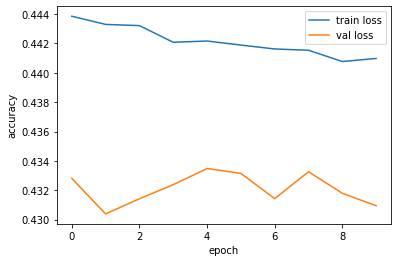

In [71]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

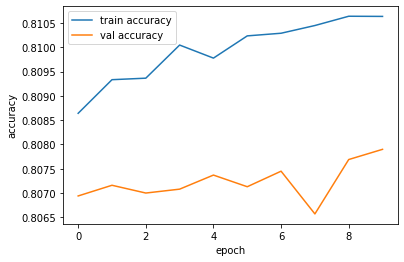

In [72]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

Evaluation on Test Data


In [68]:
model.evaluate(X_test, y_test)

3125/3125 [==============================] - 5s 1ms/step - loss: 0.4346 - accuracy: 0.8070


[0.4346204698085785, 0.8069700002670288]

In [1]:
# Load the saved encoded dataset
f3=gzip.GzipFile('/content/drive/My Drive/judgement.npy.gz','r')
X_test = np.load(f)
X_test = np.array(X_test)
f4=gzip.GzipFile('/content/drive/My Drive/judgement2.npy.gz','r') # We split up our data to quickly encode it on multiple computers
X_test2 = np.load(f)
X_test2 = np.array(X_test2)
# Concatentate Arrays Row-Wise
X_test = np.concatenate((X_test,X_test2))
# Load the original dataset
testingdata = pd.read_csv('contestant_judgment.csv')
# Predict sentiment from model
pred=model.predict(X_test)
# Write into csv
testingdata['Sentiment']=pred
testingdata.to_csv('predictions.csv')